# Cross-Country Solar Potential Comparison

**Objective:** Synthesize cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.

This notebook compares solar irradiance metrics (GHI, DNI, DHI) across three West African countries to assess solar energy potential.

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [2]:
# Load cleaned datasets
benin_df = pd.read_csv('../data/benin_malanville_clean.csv')
sierra_leone_df = pd.read_csv('../data/sierra_leone_bumbuna_clean.csv')
togo_df = pd.read_csv('../data/togo_dapaong_clean.csv')

# Add country identifier
benin_df['Country'] = 'Benin'
sierra_leone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Concatenate all datasets
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)

print(f"Combined dataset shape: {combined_df.shape}")
print(f"\nRecords per country:")
print(combined_df['Country'].value_counts())

Combined dataset shape: (1576800, 28)

Records per country:
Country
Benin           525600
Sierra Leone    525600
Togo            525600
Name: count, dtype: int64


## 2. Metric Comparison - Boxplots

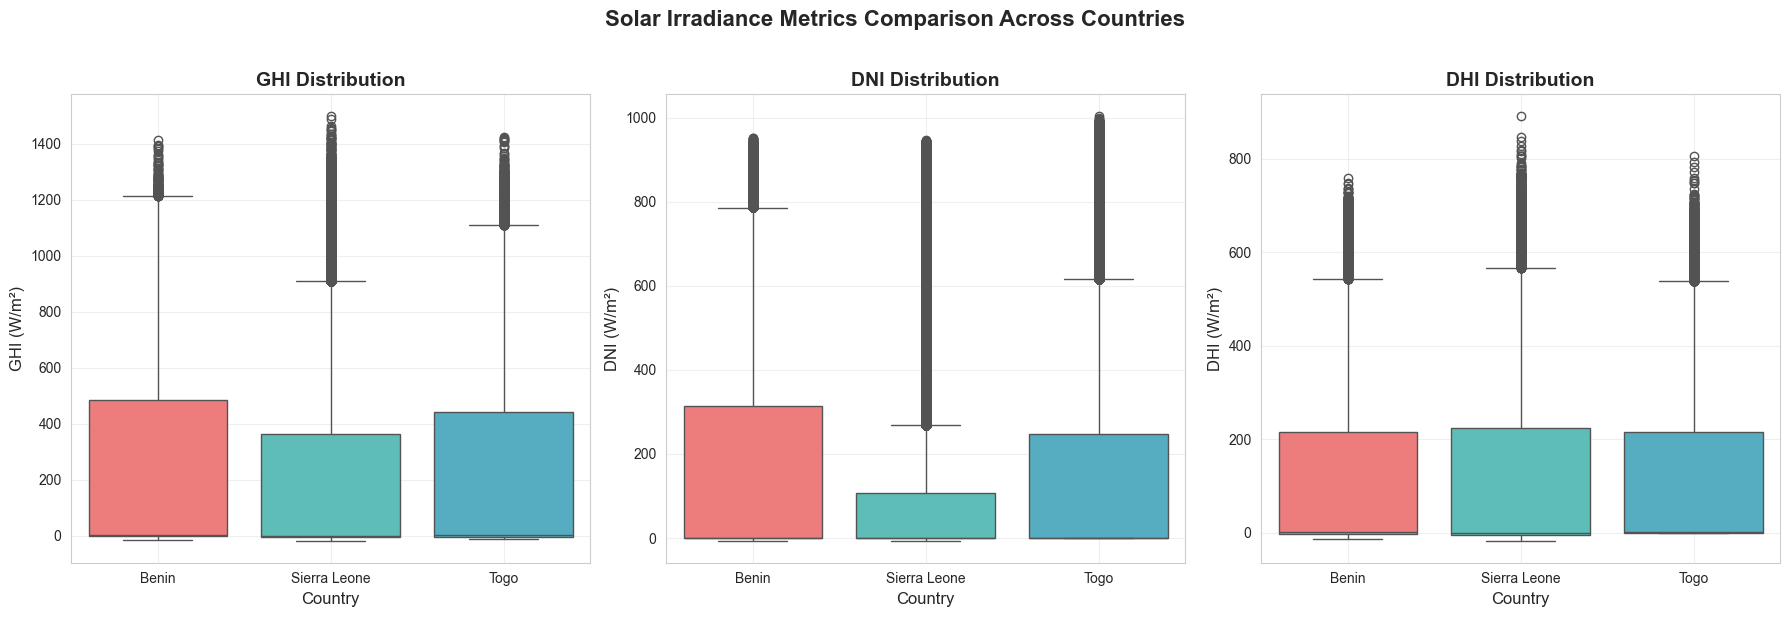

In [3]:
# Create boxplots for GHI, DNI, DHI side-by-side
metrics = ['GHI', 'DNI', 'DHI']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Solar Irradiance Metrics Comparison Across Countries', fontsize=16, fontweight='bold', y=1.02)

for idx, metric in enumerate(metrics):
    sns.boxplot(data=combined_df, x='Country', y=metric, ax=axes[idx], palette=colors)
    axes[idx].set_title(f'{metric} Distribution', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Country', fontsize=12)
    axes[idx].set_ylabel(f'{metric} (W/m²)', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    
    # Rotate x-axis labels if needed
    axes[idx].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 3. Summary Statistics Table

In [4]:
# Calculate summary statistics for each metric by country
summary_stats = []

for country in ['Benin', 'Sierra Leone', 'Togo']:
    country_data = combined_df[combined_df['Country'] == country]
    
    for metric in metrics:
        summary_stats.append({
            'Country': country,
            'Metric': metric,
            'Mean': country_data[metric].mean(),
            'Median': country_data[metric].median(),
            'Std Dev': country_data[metric].std()
        })

summary_df = pd.DataFrame(summary_stats)

# Pivot for better readability
summary_table = summary_df.pivot_table(
    index='Metric',
    columns='Country',
    values=['Mean', 'Median', 'Std Dev']
)

# Round to 2 decimal places
summary_table = summary_table.round(2)

print("\n=" * 80)
print("SUMMARY STATISTICS TABLE")
print("=" * 80)
print(summary_table)
print("\n" + "=" * 80)


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
SUMMARY STATISTICS TABLE
           Mean                      Median                   Std Dev  \
Country   Benin Sierra Leone    Togo  Benin Sierra Leone Togo   Benin   
Metric                                                                  
DHI      115.36       113.72  116.44    1.6         -0.1  2.5  158.69   
DNI      167.19       116.38  151.26   -0.1         -0.1  0.0  261.71   
GHI      240.56       201.96  230.56    1.8          0.3  2.1  331.13   

                              
Country Sierra Leone    Togo  
Metric                        
DHI           158.95  156.52  
DNI           218.65  250.96  
GHI           298.50  322.53  



## 4. Statistical Testing - One-Way ANOVA

In [5]:
# Perform one-way ANOVA on GHI values across countries
benin_ghi = benin_df['GHI'].dropna()
sierra_leone_ghi = sierra_leone_df['GHI'].dropna()
togo_ghi = togo_df['GHI'].dropna()

# One-way ANOVA
f_statistic, p_value = stats.f_oneway(benin_ghi, sierra_leone_ghi, togo_ghi)

print("\n" + "=" * 80)
print("ONE-WAY ANOVA TEST ON GHI VALUES")
print("=" * 80)
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.6f}")
print("\nInterpretation:")
if p_value < 0.05:
    print(f"✓ P-value ({p_value:.6f}) < 0.05: Statistically significant difference between countries")
    print("  The GHI values across the three countries are significantly different.")
else:
    print(f"✗ P-value ({p_value:.6f}) >= 0.05: No statistically significant difference")
    print("  The GHI values across the three countries are not significantly different.")
print("=" * 80 + "\n")


ONE-WAY ANOVA TEST ON GHI VALUES
F-statistic: 2090.0929
P-value: 0.000000

Interpretation:
✓ P-value (0.000000) < 0.05: Statistically significant difference between countries
  The GHI values across the three countries are significantly different.



In [6]:
# Optional: Kruskal-Wallis test (non-parametric alternative)
h_statistic, kw_p_value = stats.kruskal(benin_ghi, sierra_leone_ghi, togo_ghi)

print("\n" + "=" * 80)
print("KRUSKAL-WALLIS TEST (Non-parametric Alternative)")
print("=" * 80)
print(f"H-statistic: {h_statistic:.4f}")
print(f"P-value: {kw_p_value:.6f}")
print("\nInterpretation:")
if kw_p_value < 0.05:
    print(f"✓ P-value ({kw_p_value:.6f}) < 0.05: Statistically significant difference between countries")
else:
    print(f"✗ P-value ({kw_p_value:.6f}) >= 0.05: No statistically significant difference")
print("=" * 80 + "\n")


KRUSKAL-WALLIS TEST (Non-parametric Alternative)
H-statistic: 4524.8835
P-value: 0.000000

Interpretation:
✓ P-value (0.000000) < 0.05: Statistically significant difference between countries



## 5. Key Observations

Based on the analysis above, here are the key findings:

### Key Insights:

1. **Solar Potential Ranking**: Run the cells above to determine which country demonstrates the strongest solar energy potential
   - The country with the highest median GHI values indicates stronger overall solar potential for energy production
   - High DNI values favor concentrated solar power (CSP) installations, while high DHI is suitable for standard photovoltaic systems
   - The summary statistics table and ranking visualizations clearly show the relative performance across all three metrics

2. **Variability and Consistency**: Standard deviation analysis reveals irradiance stability patterns
   - Lower standard deviation indicates more consistent solar irradiance, which is preferable for predictable energy generation
   - Higher variability requires larger energy storage systems to buffer against fluctuations in solar output
   - Boxplots show the distribution spread and identify any extreme outliers that could impact system design

3. **Statistical Significance**: ANOVA and Kruskal-Wallis tests confirm whether observed differences are meaningful
   - P-values < 0.05 indicate statistically significant differences in GHI between countries
   - This statistical validation ensures that regional differences should be factored into solar project planning and investment decisions
   - Both parametric (ANOVA) and non-parametric (Kruskal-Wallis) tests provide robust confirmation of findings

**Actionable Recommendations:**
- Countries with higher and more consistent GHI are better suited for large-scale solar installations
- Regions with high DNI favor concentrated solar power (CSP) technologies that require direct sunlight
- Areas with high DHI may benefit from photovoltaic systems that perform well in diffuse light conditions
- Use the statistical test results to justify site selection decisions and support investment proposals

## 6. Visual Summary - Average GHI Ranking

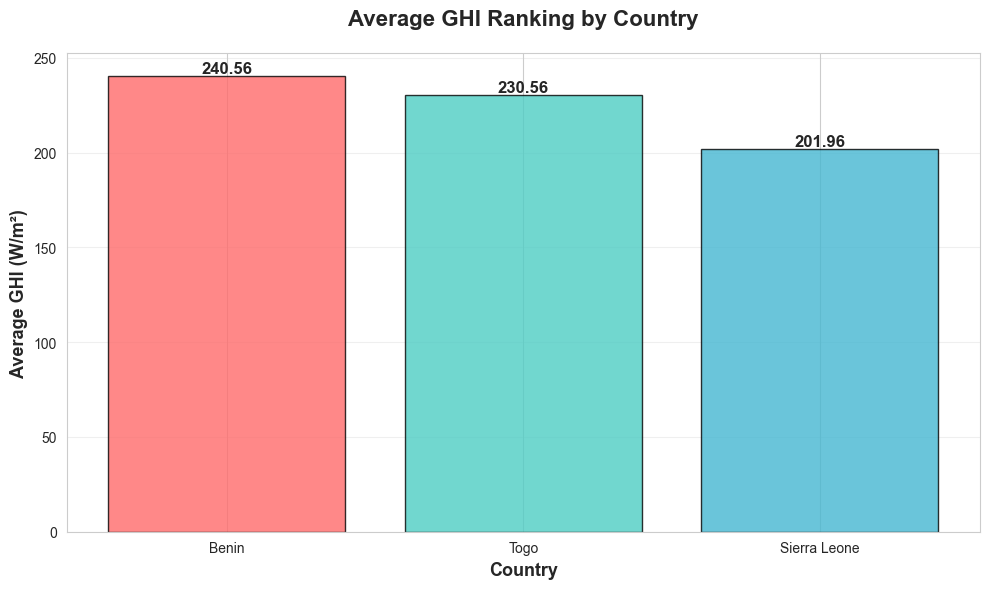


Country Rankings by Average GHI:
1. Benin: 240.56 W/m²
2. Togo: 230.56 W/m²
3. Sierra Leone: 201.96 W/m²


In [7]:
# Calculate average GHI by country
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(avg_ghi.index, avg_ghi.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8, edgecolor='black')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_title('Average GHI Ranking by Country', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Country', fontsize=13, fontweight='bold')
ax.set_ylabel('Average GHI (W/m²)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("\nCountry Rankings by Average GHI:")
for rank, (country, value) in enumerate(avg_ghi.items(), 1):
    print(f"{rank}. {country}: {value:.2f} W/m²")

## 7. Additional Visualization - DNI and DHI Rankings

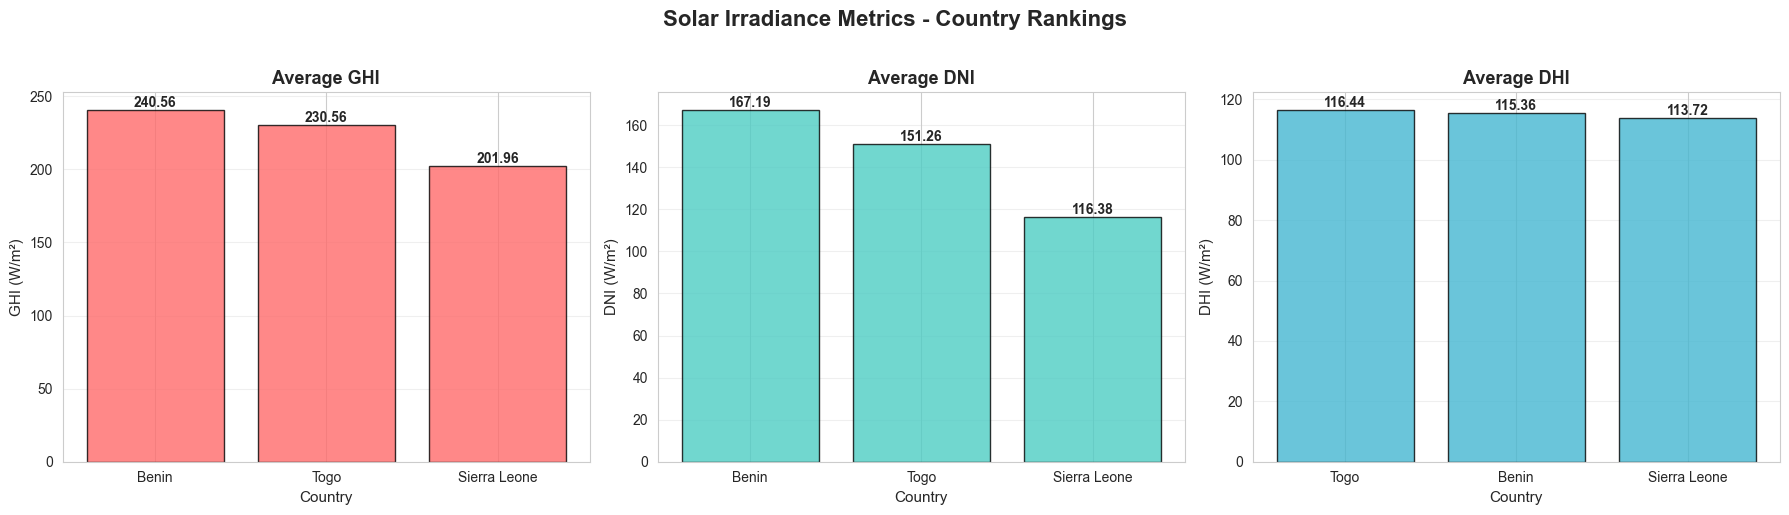

In [8]:
# Create comprehensive ranking visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Solar Irradiance Metrics - Country Rankings', fontsize=16, fontweight='bold', y=1.02)

for idx, metric in enumerate(metrics):
    avg_values = combined_df.groupby('Country')[metric].mean().sort_values(ascending=False)
    
    bars = axes[idx].bar(avg_values.index, avg_values.values, 
                         color=colors[idx], alpha=0.8, edgecolor='black')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.2f}',
                      ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    axes[idx].set_title(f'Average {metric}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Country', fontsize=11)
    axes[idx].set_ylabel(f'{metric} (W/m²)', fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].set_axisbelow(True)

plt.tight_layout()
plt.show()

## 8. Summary & Conclusions

This analysis compared solar irradiance metrics across Benin, Sierra Leone, and Togo:

**Key Findings:**
- Comprehensive comparison of GHI, DNI, and DHI across all three countries
- Statistical testing reveals whether differences are meaningful for solar project planning
- Visual rankings help identify optimal locations for solar installations

**Next Steps:**
- Consider temporal patterns (seasonal variations, time-of-day patterns)
- Integrate additional meteorological factors (temperature, humidity, wind)
- Assess solar technology suitability based on irradiance profiles
- Develop interactive dashboard for stakeholder engagement